# Font Classifier using FastAI

In [1]:
import fastai
from fastai.vision import *

In [2]:
PATH = "/home/paperspace/code/fontastic/data"


In [3]:
df_train = pd.read_csv('../train.csv')

In [4]:
df_train.head()

,filename,class
0,Fahkwang-BoldItalic_300_rand_crop_5.jpg,Fahkwang-BoldItalic
1,Lora-BoldItalic_150_rand_crop_0.jpg,Lora-BoldItalic
2,Fahkwang-Light_300_rand_crop_5.jpg,Fahkwang-Light
3,Fahkwang-Italic_80_rand_crop_7.jpg,Fahkwang-Italic
4,Lato-Light_50_rand_crop_1.jpg,Lato-Light


In [5]:
df_train['path'] = df_train.filename.apply(lambda x: f"{x.split('-')[0]}/{x}")
df_train['labels'] = df_train['class'].apply(lambda x: ','.join(x.split('-')))

In [6]:
df_train.head()

,filename,class,path,labels
0,Fahkwang-BoldItalic_300_rand_crop_5.jpg,Fahkwang-BoldItalic,Fahkwang/Fahkwang-BoldItalic_300_rand_crop_5.jpg,"Fahkwang,BoldItalic"
1,Lora-BoldItalic_150_rand_crop_0.jpg,Lora-BoldItalic,Lora/Lora-BoldItalic_150_rand_crop_0.jpg,"Lora,BoldItalic"
2,Fahkwang-Light_300_rand_crop_5.jpg,Fahkwang-Light,Fahkwang/Fahkwang-Light_300_rand_crop_5.jpg,"Fahkwang,Light"
3,Fahkwang-Italic_80_rand_crop_7.jpg,Fahkwang-Italic,Fahkwang/Fahkwang-Italic_80_rand_crop_7.jpg,"Fahkwang,Italic"
4,Lato-Light_50_rand_crop_1.jpg,Lato-Light,Lato/Lato-Light_50_rand_crop_1.jpg,"Lato,Light"


In [7]:
df_train = df_train[['path', 'labels']]
df_train.columns = ['x', 'y']

In [8]:
data = (ImageList.from_df(df_train, path=PATH, cols=['x'], folder='training')
     .random_split_by_pct(valid_pct=0.1)
     #How to split in train/valid? -> randomly with the default 20% in valid
     .label_from_df(cols=['y'], label_delim=',')
     .transform(get_transforms(do_flip=False), size=256)
     .databunch(bs=32)
     .normalize(imagenet_stats)
)

In [9]:
df_train.y.unique()

array(['Fahkwang,BoldItalic', 'Lora,BoldItalic', 'Fahkwang,Light', 'Fahkwang,Italic', 'Lato,Light',
       'Merriweather,Black', 'Fahkwang,Medium', 'Fahkwang,LightItalic', 'MajorMonoDisplay,Regular', 'Lato,BoldItalic',
       'Lato,LightItalic', 'Fahkwang,Bold', 'Lato,BlackItalic', 'Lato,HairlineItalic', 'Lora,Italic',
       'Fahkwang,MediumItalic', 'Fahkwang,SemiBold', 'Fahkwang,ExtraLight', 'Lato,Black', 'Merriweather,BlackItalic',
       'Lato,Regular', 'Lato,Hairline', 'Lobster,Regular', 'Fahkwang,Regular', 'Fahkwang,SemiBoldItalic',
       'Lora,Regular', 'Fahkwang,ExtraLightItalic', 'Lato,Italic', 'Lora,Bold', 'Merriweather,Bold', 'Lato,Bold',
       'Merriweather,BoldItalic'], dtype=object)

In [10]:
data.classes

['Black',
 'BlackItalic',
 'Bold',
 'BoldItalic',
 'ExtraLight',
 'ExtraLightItalic',
 'Fahkwang',
 'Hairline',
 'HairlineItalic',
 'Italic',
 'Lato',
 'Light',
 'LightItalic',
 'Lobster',
 'Lora',
 'MajorMonoDisplay',
 'Medium',
 'MediumItalic',
 'Merriweather',
 'Regular',
 'SemiBold',
 'SemiBoldItalic']

In [11]:
data.device

device(type='cuda')

In [12]:
from torch.cuda import get_device_name

In [13]:
torch.cuda.current_device()

0

In [14]:
ds = data.train_ds

In [15]:
len(ds.y)

900

In [16]:
len(data.valid_ds.y)

99

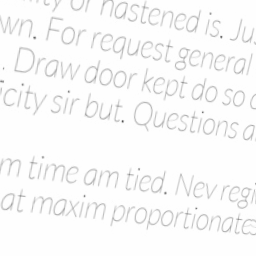

In [17]:
img,label = ds[411]
img

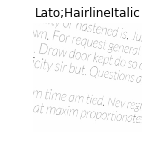

In [18]:
img.show(figsize=(2,2), title=label)


In [9]:
learn = create_cnn(data, models.resnet34, metrics=fbeta)

In [20]:
learn.crit = nn.BCEWithLogitsLoss

In [21]:
data.batch_size = 32

In [22]:
df_train.head()

,x,y
0,Fahkwang/Fahkwang-BoldItalic_300_rand_crop_5.jpg,"Fahkwang,BoldItalic"
1,Lora/Lora-BoldItalic_150_rand_crop_0.jpg,"Lora,BoldItalic"
2,Fahkwang/Fahkwang-Light_300_rand_crop_5.jpg,"Fahkwang,Light"
3,Fahkwang/Fahkwang-Italic_80_rand_crop_7.jpg,"Fahkwang,Italic"
4,Lato/Lato-Light_50_rand_crop_1.jpg,"Lato,Light"


In [23]:
df_train.loc[df_train['x'] == 'MajorMonoDisplay/MajorMonoDisplay-Regular_80_rand_crop_9.jpg']

,x,y
667,MajorMonoDisplay/MajorMonoDisplay-Regular_80_r...,"MajorMonoDisplay,Regular"


In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


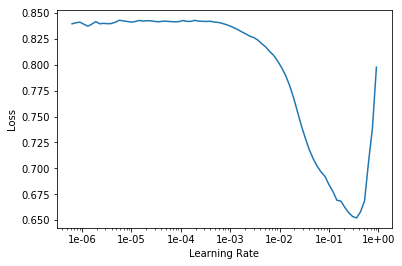

In [25]:
learn.recorder.plot()

In [26]:
lr = 1e-01

In [27]:
lr

0.1

In [28]:
learn.fit_one_cycle(10, max_lr=lr)

epoch,train_loss,valid_loss,fbeta,time
1,0.471756,0.540242,0.305138,00:09
2,0.330330,0.378484,0.420555,00:08
3,0.295141,0.472673,0.353773,00:08
4,0.317091,0.604686,0.236379,00:08
5,0.321163,0.414953,0.336113,00:08
6,0.305958,0.275864,0.390951,00:08
7,0.271105,0.246438,0.587367,00:08
8,0.236617,0.145716,0.730730,00:08
9,0.202201,0.154440,0.795025,00:08
10,0.177614,0.124318,0.793940,00:08


In [29]:
learn.unfreeze()

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


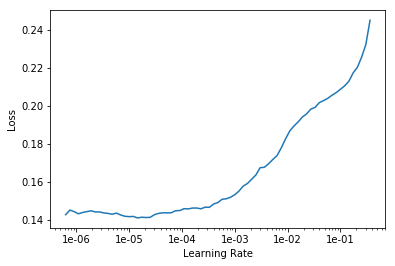

In [31]:
learn.recorder.plot()

In [34]:
lr = 1e-05

In [35]:
lr

1e-05

In [36]:
learn.fit_one_cycle(10, max_lr=lr)

epoch,train_loss,valid_loss,fbeta,time
1,0.146605,0.115626,0.793021,00:12
2,0.143635,0.111268,0.831601,00:12
3,0.143665,0.116104,0.802373,00:12
4,0.146163,0.210772,0.783620,00:12
5,0.144220,0.808420,0.806635,00:12
6,0.144292,0.709766,0.819291,00:12
7,0.143660,0.968521,0.802752,00:12
8,0.143403,0.690756,0.792079,00:12
9,0.143599,0.817078,0.821582,00:12
10,0.144677,0.961224,0.806807,00:12


In [37]:
learn.freeze()

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


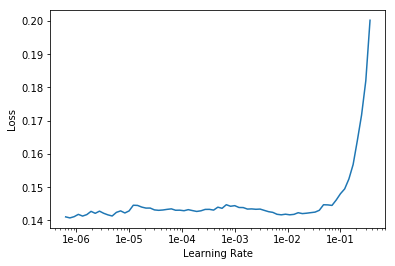

In [39]:
learn.recorder.plot()

In [40]:
lr = 1e-02

In [41]:
lr

0.01

In [42]:
learn.fit_one_cycle(10, max_lr=lr)

epoch,train_loss,valid_loss,fbeta,time
1,0.144880,0.607852,0.819553,00:08
2,0.141591,1.211108,0.793283,00:08
3,0.141096,1.567345,0.781378,00:08
4,0.139446,1.390405,0.803684,00:08
5,0.134822,0.101091,0.794179,00:08
6,0.127673,0.115909,0.851973,00:08
7,0.122253,0.083324,0.871697,00:08
8,0.118083,0.072897,0.902816,00:08
9,0.113160,0.069941,0.886746,00:08
10,0.109525,0.071507,0.893123,00:08


In [43]:
learn.unfreeze()

In [44]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


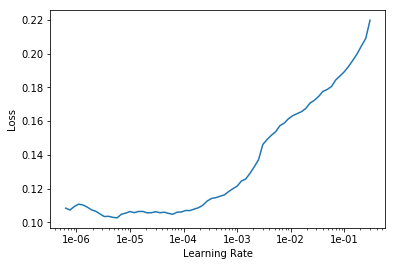

In [45]:
learn.recorder.plot()

In [46]:
lr = 1e-04

In [47]:
lr

0.0001

In [48]:
learn.fit_one_cycle(10, max_lr=lr)

epoch,train_loss,valid_loss,fbeta,time
1,0.113764,0.080065,0.862504,00:12
2,0.112341,0.144414,0.809173,00:12
3,0.114317,0.658779,0.801950,00:12
4,0.112765,0.084665,0.878268,00:12
5,0.113140,4.462151,0.647255,00:12
6,0.107027,0.077405,0.877222,00:12
7,0.101257,0.055281,0.916437,00:12
8,0.095346,0.049488,0.935109,00:12
9,0.094295,0.054118,0.905724,00:12
10,0.095246,0.057459,0.906336,00:12


In [49]:
learn.freeze()

In [50]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


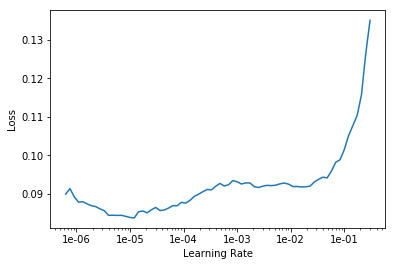

In [51]:
learn.recorder.plot()

In [54]:
lr = 1e-04

In [55]:
lr

0.0001

In [56]:
learn.fit_one_cycle(10, max_lr=lr)

epoch,train_loss,valid_loss,fbeta,time
1,0.093873,0.052617,0.912560,00:08
2,0.089478,0.053185,0.909244,00:08
3,0.089464,0.051986,0.914907,00:08
4,0.088045,0.053041,0.914830,00:08
5,0.088642,0.050793,0.914907,00:08
6,0.088009,0.050301,0.911999,00:08
7,0.088253,0.048507,0.916080,00:08
8,0.088132,0.049280,0.915672,00:08
9,0.086365,0.049698,0.915519,00:08
10,0.085348,0.049961,0.915825,00:08


In [57]:
learn.unfreeze()

In [58]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


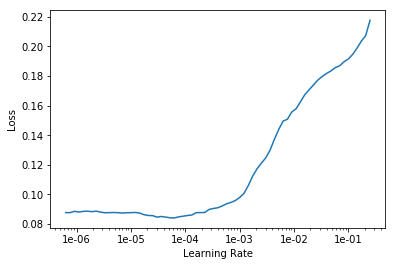

In [59]:
learn.recorder.plot()

In [60]:
lr = 1e-04

In [61]:
lr

0.0001

In [62]:
learn.fit_one_cycle(10, max_lr=lr)

epoch,train_loss,valid_loss,fbeta,time
1,0.090764,0.349919,0.913001,00:12
2,0.089313,0.078911,0.863483,00:12
3,0.091451,0.950773,0.765509,00:12
4,0.091157,0.053964,0.927456,00:12
5,0.090687,0.199506,0.912524,00:12
6,0.088341,0.075715,0.876518,00:12
7,0.084464,0.045163,0.938017,00:12
8,0.080797,0.041231,0.944598,00:12
9,0.079107,0.041737,0.949801,00:12
10,0.075956,0.041274,0.948500,00:12


In [63]:
learn.freeze()

In [64]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


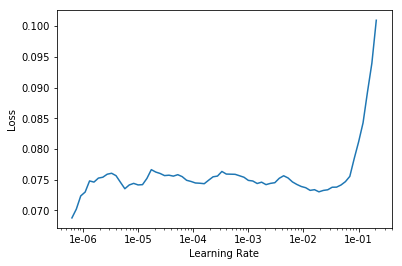

In [65]:
learn.recorder.plot()

In [66]:
lr = 1e-02

In [67]:
lr

0.01

In [68]:
learn.fit_one_cycle(10, max_lr=lr)

epoch,train_loss,valid_loss,fbeta,time
1,0.070825,0.042214,0.934267,00:08
2,0.070511,0.063512,0.885114,00:08
3,0.073874,0.510817,0.860627,00:08
4,0.077189,0.062835,0.881237,00:08
5,0.076399,0.070123,0.853688,00:08
6,0.074548,0.077589,0.909064,00:08
7,0.072738,0.047528,0.919804,00:08
8,0.070693,0.030408,0.952505,00:08
9,0.065809,0.028789,0.962657,00:08
10,0.064175,0.027865,0.964800,00:08


In [69]:
interp = ClassificationInterpretation.from_learner(learn)


In [73]:
learn.save('fontastic_resnet_34_256')

In [11]:
learn = learn.load('fontastic_resnet_34_256')

In [12]:
preds, _ = learn.get_preds(ds_type=DatasetType.Valid)

In [13]:
learn.data.valid_ds.items

array(['/home/paperspace/code/fontastic/data/training/Fahkwang/Fahkwang-Medium_80_rand_crop_0.jpg',
       '/home/paperspace/code/fontastic/data/training/Lato/Lato-Italic_150_rand_crop_4.jpg',
       '/home/paperspace/code/fontastic/data/training/Lato/Lato-BlackItalic_300_rand_crop_9.jpg',
       '/home/paperspace/code/fontastic/data/training/Fahkwang/Fahkwang-Light_80_rand_crop_1.jpg', ...,
       '/home/paperspace/code/fontastic/data/training/Fahkwang/Fahkwang-Italic_50_rand_crop_9.jpg',
       '/home/paperspace/code/fontastic/data/training/Lato/Lato-Light_80_rand_crop_1.jpg',
       '/home/paperspace/code/fontastic/data/training/Lato/Lato-LightItalic_80_rand_crop_5.jpg',
       '/home/paperspace/code/fontastic/data/training/Fahkwang/Fahkwang-Light_300_rand_crop_9.jpg'], dtype='<U108')

In [14]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]
fnames = [f for f in learn.data.valid_ds.items]
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])
# dataframes.append(df)

In [15]:
df.iloc[0].image_name

'/home/paperspace/code/fontastic/data/training/Fahkwang/Fahkwang-Medium_80_rand_crop_0.jpg'

In [16]:
df['img'] = df['image_name'].apply(lambda x: x.split('/')[-1])

## Predict on test set

In [9]:
df_test = pd.read_csv('../test.csv')

In [10]:
df_test.head()

,filename,class
0,Fahkwang-Italic_80_rand_crop_6.jpg,Fahkwang-Italic
1,Fahkwang-MediumItalic_150_rand_crop_6.jpg,Fahkwang-MediumItalic
2,Lato-LightItalic_50_rand_crop_0.jpg,Lato-LightItalic
3,Fahkwang-MediumItalic_150_rand_crop_3.jpg,Fahkwang-MediumItalic
4,Lato-LightItalic_150_rand_crop_3.jpg,Lato-LightItalic


In [11]:
df_test['path'] = df_test.filename.apply(lambda x: f"{x.split('-')[0]}/{x}")
df_test['labels'] = df_test['class'].apply(lambda x: ','.join(x.split('-')))

In [12]:
df_test.head()

,filename,class,path,labels
0,Fahkwang-Italic_80_rand_crop_6.jpg,Fahkwang-Italic,Fahkwang/Fahkwang-Italic_80_rand_crop_6.jpg,"Fahkwang,Italic"
1,Fahkwang-MediumItalic_150_rand_crop_6.jpg,Fahkwang-MediumItalic,Fahkwang/Fahkwang-MediumItalic_150_rand_crop_6...,"Fahkwang,MediumItalic"
2,Lato-LightItalic_50_rand_crop_0.jpg,Lato-LightItalic,Lato/Lato-LightItalic_50_rand_crop_0.jpg,"Lato,LightItalic"
3,Fahkwang-MediumItalic_150_rand_crop_3.jpg,Fahkwang-MediumItalic,Fahkwang/Fahkwang-MediumItalic_150_rand_crop_3...,"Fahkwang,MediumItalic"
4,Lato-LightItalic_150_rand_crop_3.jpg,Lato-LightItalic,Lato/Lato-LightItalic_150_rand_crop_3.jpg,"Lato,LightItalic"


In [13]:
df_test = df_test[['path', 'labels']]
df_test.columns = ['x', 'y']

In [14]:
df_test.head()

,x,y
0,Fahkwang/Fahkwang-Italic_80_rand_crop_6.jpg,"Fahkwang,Italic"
1,Fahkwang/Fahkwang-MediumItalic_150_rand_crop_6...,"Fahkwang,MediumItalic"
2,Lato/Lato-LightItalic_50_rand_crop_0.jpg,"Lato,LightItalic"
3,Fahkwang/Fahkwang-MediumItalic_150_rand_crop_3...,"Fahkwang,MediumItalic"
4,Lato/Lato-LightItalic_150_rand_crop_3.jpg,"Lato,LightItalic"


In [90]:
df_test.shape

(250, 2)

In [15]:
learn = create_cnn(data, models.resnet34, metrics=fbeta)

In [16]:
learn = learn.load('fontastic_resnet_34_256')

### Add test data to data bunch

In [36]:
data.add_test(ImageList.from_df(df_test, path=PATH, cols=['x'], folder='training'), df_test['y'])


### Test time augmentation

In [37]:
preds, _ = learn.TTA(ds_type=DatasetType.Test)

In [38]:
preds

tensor([[2.1406e-05, 3.3513e-05, 5.1765e-05,  ..., 9.6022e-02, 5.8283e-04,
         8.6584e-03],
        [1.9808e-04, 2.3950e-04, 5.3794e-03,  ..., 9.4274e-02, 2.3353e-02,
         2.2403e-02],
        [7.7533e-04, 1.1761e-04, 5.0942e-04,  ..., 3.3248e-03, 2.6035e-05,
         8.6169e-05],
        ...,
        [1.1126e-05, 1.2683e-05, 6.1526e-06,  ..., 1.1243e-02, 5.9007e-05,
         2.6179e-04],
        [2.2748e-01, 5.0820e-05, 2.5438e-06,  ..., 3.7532e-02, 1.3187e-01,
         1.7965e-06],
        [1.3136e-03, 7.5942e-05, 2.1331e-04,  ..., 9.8460e-01, 1.3508e-06,
         2.6727e-06]])

In [39]:
len(labelled_preds)

250

In [40]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]


In [41]:
df_test['pred']=labelled_preds

In [42]:
df_test

,x,y,pred
0,Fahkwang/Fahkwang-Italic_80_rand_crop_6.jpg,"Fahkwang,Italic",Fahkwang Italic
1,Fahkwang/Fahkwang-MediumItalic_150_rand_crop_6...,"Fahkwang,MediumItalic",Fahkwang Italic
2,Lato/Lato-LightItalic_50_rand_crop_0.jpg,"Lato,LightItalic",ExtraLightItalic Fahkwang Lato
3,Fahkwang/Fahkwang-MediumItalic_150_rand_crop_3...,"Fahkwang,MediumItalic",Fahkwang Italic MediumItalic
4,Lato/Lato-LightItalic_150_rand_crop_3.jpg,"Lato,LightItalic",Lato LightItalic
5,Lora/Lora-Bold_80_rand_crop_7.jpg,"Lora,Bold",Bold Lora
6,Fahkwang/Fahkwang-BoldItalic_150_rand_crop_5.jpg,"Fahkwang,BoldItalic",BoldItalic Fahkwang SemiBoldItalic
7,Lato/Lato-Hairline_80_rand_crop_9.jpg,"Lato,Hairline",Hairline Lato
8,Lato/Lato-LightItalic_300_rand_crop_7.jpg,"Lato,LightItalic",Lato LightItalic
9,Fahkwang/Fahkwang-Medium_80_rand_crop_7.jpg,"Fahkwang,Medium",Fahkwang Medium Regular
